<h1><center>Machine Learning Project - AVAZU<center></h1>


In [1]:
import sys
from zipfile import ZipFile
import os.path as op
try:
    from urllib.request import urlretrieve
except ImportError:  # Python 2 compat
    from urllib import urlretrieve
    
AVAZU_URL = "https://bianchi.wp.imt.fr/files/2019/05/train-1000000.zip"
AVAZU_FILENAME = AVAZU_URL.rsplit('/', 1)[1]


if not op.exists(AVAZU_FILENAME):
    print('Downloading %s to %s...' % (AVAZU_URL, AVAZU_FILENAME))
    urlretrieve(AVAZU_URL, AVAZU_FILENAME)
    ZipFile(AVAZU_FILENAME).extractall('.')

In [2]:
ZipFile(AVAZU_FILENAME).extractall('.')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Data description here: https://www.kaggle.com/c/avazu-ctr-prediction/data  


In [4]:
df = pd.read_csv('train-1000000')

## Work assignment

1.   Perform Exploratory Data Analysis (EDA)
2.   Predict the probability that an add is clicked, based on the features. 
3.   Evaluate the performance of your method.

## Work evaluation

Your work will be evaluated based on:

*   The interest of the EDA (4 points)
*   The quality of the comments/remarks throughout the notebook (4 points)
*   The feature engineering (5 points)
*   The efforts made in trying several predictors and tuning them (5 points)
*   The relevance of the performance criteria used to conclude (2 points)
*   BONUS (+1pt) : Register to the AVAZU challenge in Kaggle. What is your rank?

You may find the following script useful to convert the raw time stamp into a more useable feature. For instance, you may generate new pandas series using the code:

```
df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'].apply(lambda x:datesplit(x).hour)
```



In [5]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

In [6]:
# manage the raw time
df['weekday'] = df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'] = df['hour'].apply(lambda x:datesplit(x).hour)

## EDA

### general info

In [7]:
df.head(10)
# weekdays: 0 to 6 represent Monday to Sunday
# hour: 0 - 23 represent 0:00 to 23:00

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,2,4687,320,50,423,2,39,100148,32,2
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,17894,320,50,2039,2,39,100077,32,3
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,0,22684,320,50,2619,1,163,100055,71,0
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,0,23222,320,50,2676,0,35,100176,221,2
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,0,8330,320,50,761,3,175,100081,23,2
5,1.591127e+19,0,0,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,0,21611,320,50,2480,3,297,100111,61,0
6,4.149473e+18,0,8,1010,1,85f751fd,c4e18dd6,50e219e0,03a08c3f,7801e8d9,...,3,15704,320,50,1722,0,35,100084,79,4
7,1.085379e+19,0,4,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,0,23224,320,50,2676,0,35,100176,221,2
8,2.629918e+18,0,13,1010,1,85f751fd,c4e18dd6,50e219e0,8486dd4e,7801e8d9,...,0,17875,320,50,2036,3,47,-1,156,5
9,1.419062e+19,0,0,1010,1,85f751fd,c4e18dd6,50e219e0,04f2be5f,7801e8d9,...,3,22552,320,50,2602,0,163,100084,182,6


In [8]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.226511e+18,0.169971,11.267452,1004.968549,0.288466,1.015506,0.332436,18835.759473,318.888112,60.030918,2111.794488,1.432802,226.940103,53163.356361,83.404070,2.601855
std,5.322835e+18,0.375608,5.953450,1.096112,0.505974,0.527867,0.856103,4966.228494,21.279475,47.174174,610.393836,1.325815,350.944666,49960.216178,70.326773,1.728335
min,1.003272e+13,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,0.000000
25%,4.613978e+18,0.000000,6.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,1.000000
50%,9.238351e+18,0.000000,11.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000,2.000000
75%,1.384023e+19,0.000000,16.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,101.000000,4.000000
max,1.844670e+19,1.000000,23.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,6.000000


In [9]:
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

In [10]:
# the average click rate is around 0.17, represent that 83% value of click variable is 0
df['click'].mean()

np.float64(0.169971)

In [11]:
# identify useful categorical features
df.nunique()
# form the results: C1, banner_pos, device_type, device_conn_type, C15, C16, C18, weekday are less than 10 categories

id                  1000000
click                     2
hour                     24
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_id            150501
device_ip            555248
device_model           5168
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
weekday                   7
dtype: int64

### Testing click rate distribution about features C14 - C21

In [12]:
# identify rare groups in C14 - C21
for col in ['C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']:
    print(f'--- {col} ---')
    print(df[col].value_counts())

--- C14 ---
C14
4687     23520
21611    22050
21189    19022
21191    18909
19771    18015
         ...  
23098        1
22826        1
12226        1
22660        1
18579        1
Name: count, Length: 2243, dtype: int64
--- C15 ---
C15
320     933088
300      57492
216       7345
728       1810
120         89
1024        72
480         56
768         48
Name: count, dtype: int64
--- C16 ---
C16
50      943674
250      44431
36        7345
480       2475
90        1810
20          89
768         72
320         56
1024        48
Name: count, dtype: int64
--- C17 ---
C17
1722    111327
2424     37931
2227     36296
1800     29272
423      23520
         ...  
2719         1
2448         1
2447         1
644          1
2585         1
Name: count, Length: 420, dtype: int64
--- C18 ---
C18
0    418622
3    337528
2    176368
1     67482
Name: count, dtype: int64
--- C19 ---
C19
35      300852
39      218872
167      77815
161      39387
47       35940
         ...  
45          90
683      

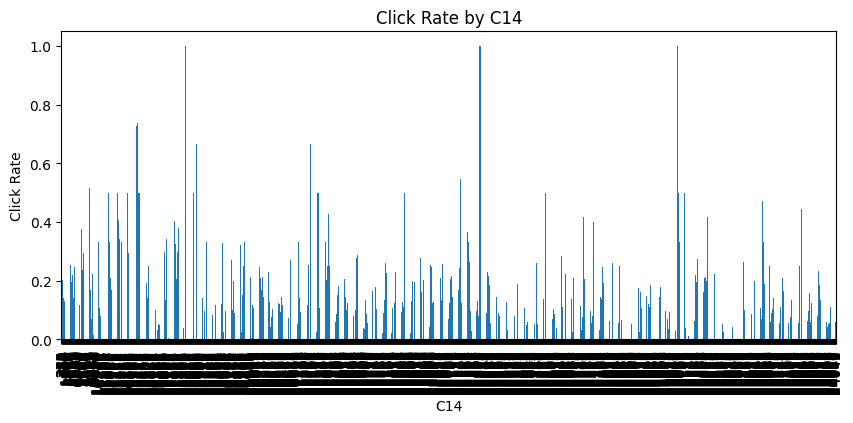

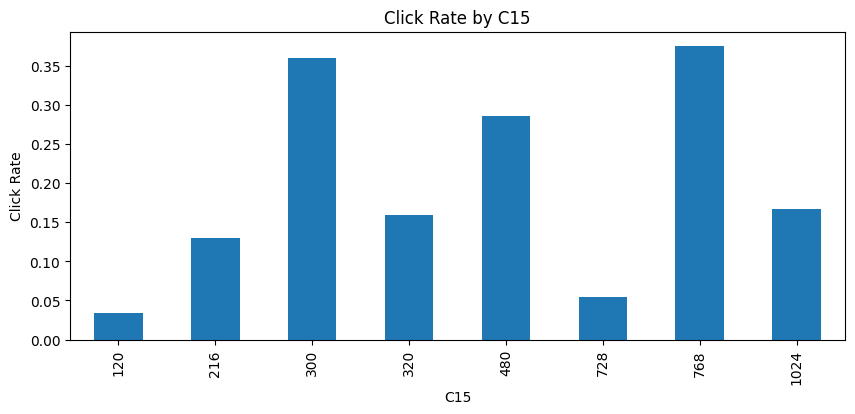

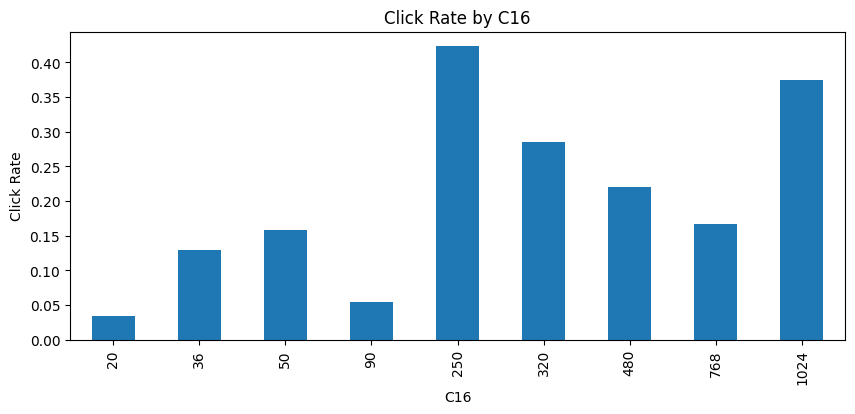

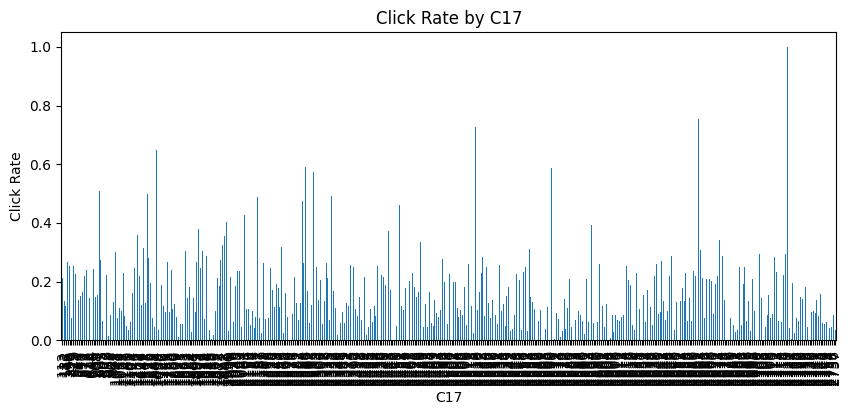

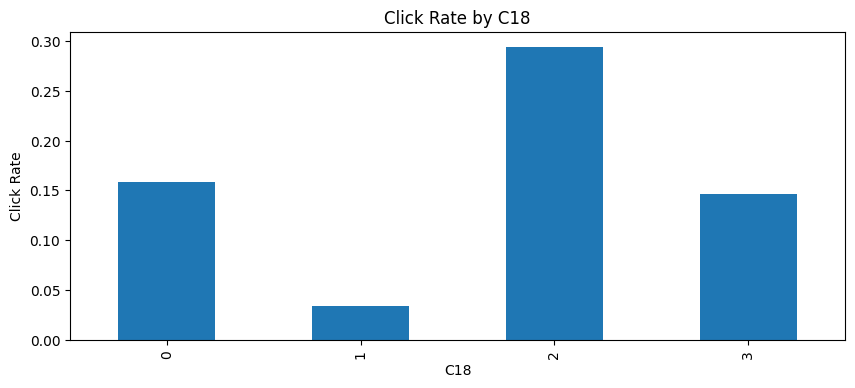

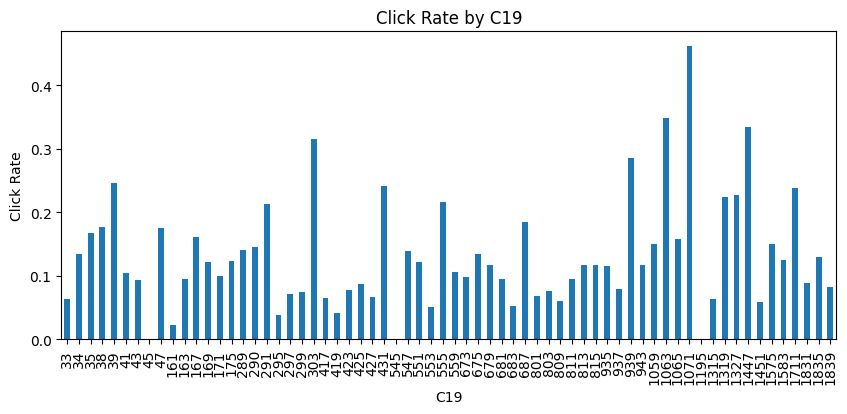

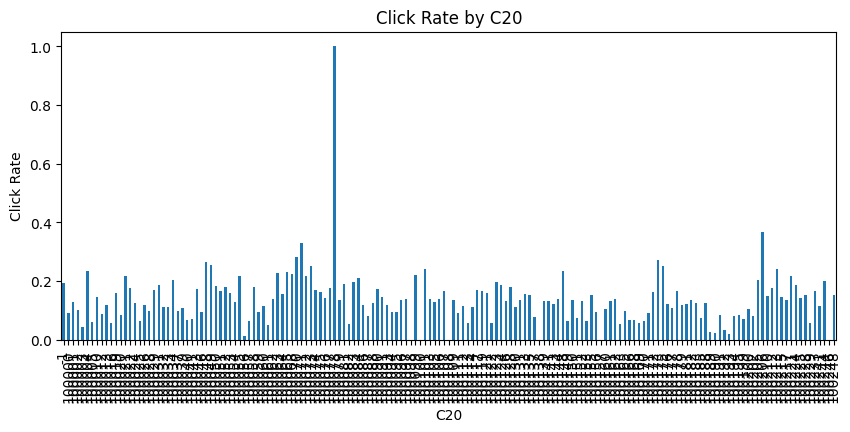

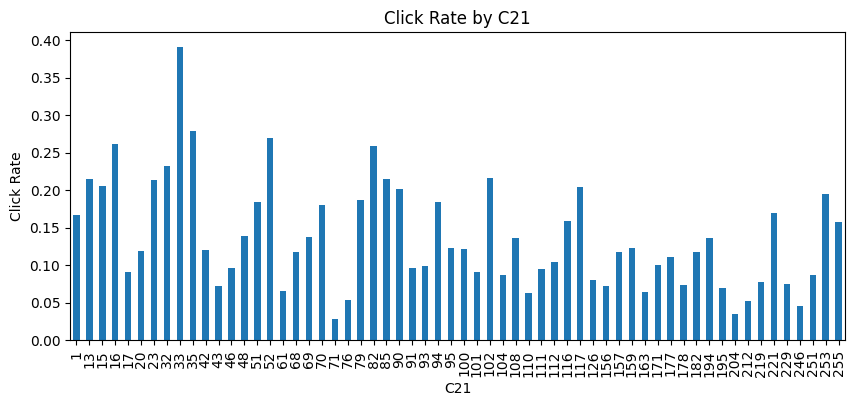

In [13]:
# check the distribution of click rate by C14 - C21 features
for col in ['C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']:
    plt.figure(figsize=(10, 4))
    df.groupby(col)['click'].mean().plot(kind='bar')
    plt.title(f'Click Rate by {col}')
    plt.ylabel('Click Rate')
    plt.show()

Based on the characteristics of c15 and c16, it is highly likely that they represent the length and width of the resolution, so they can be combined in subsequent steps.

## Several testing click rate distribution about other features

<Axes: >

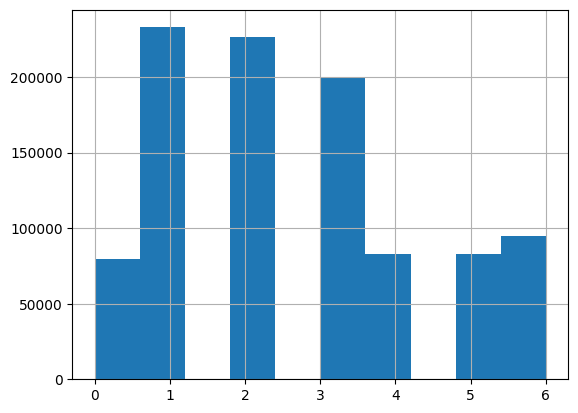

In [14]:
df['weekday'].hist()

Text(0, 0.5, 'Click Rate')

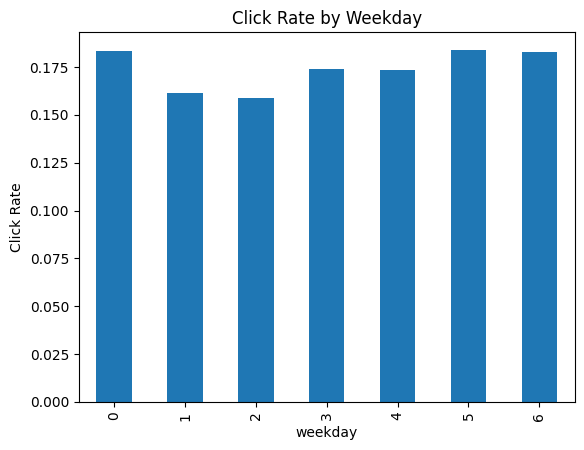

In [15]:
df.groupby('weekday')['click'].mean().plot(kind='bar')
plt.title('Click Rate by Weekday')
plt.ylabel('Click Rate')
# almost uniformly distributed, with a slight increase on weekends

<Axes: >

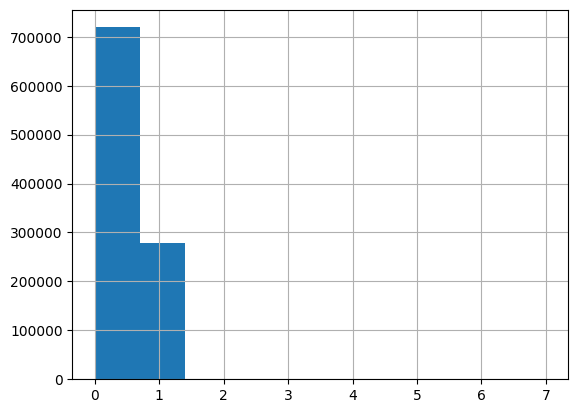

In [16]:
df['banner_pos'].hist()
# most of data belong position 0 and 1

Text(0, 0.5, 'Click Rate')

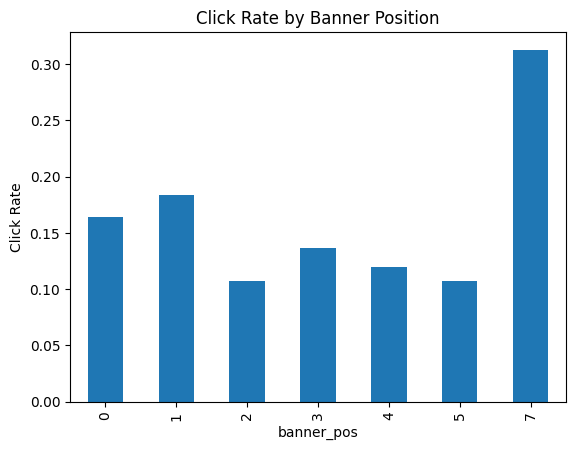

In [17]:
df.groupby('banner_pos')['click'].mean().plot(kind='bar')
plt.title('Click Rate by Banner Position')
plt.ylabel('Click Rate')
# position 1 has hiher click rate than position 0

Text(0, 0.5, 'Click Rate')

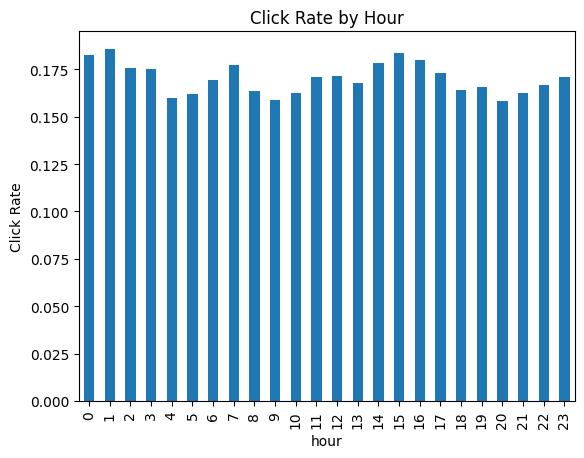

In [18]:
df.groupby('hour')['click'].mean().plot(kind='bar')
plt.title('Click Rate by Hour')
plt.ylabel('Click Rate')
# pretty uniform distribution

Text(0, 0.5, 'Click Rate')

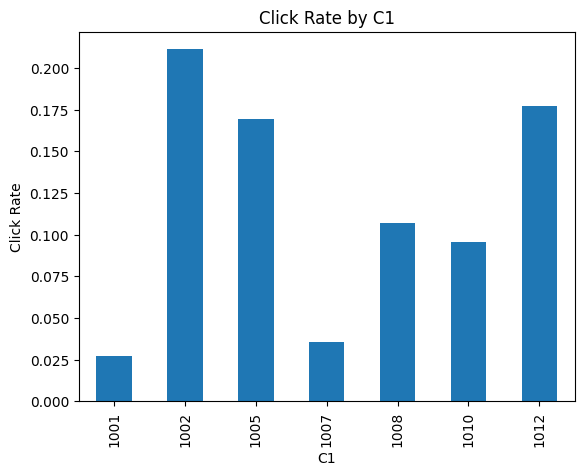

In [19]:
df.groupby('C1')['click'].mean().plot(kind='bar')
plt.title('Click Rate by C1')
plt.ylabel('Click Rate')

<Axes: >

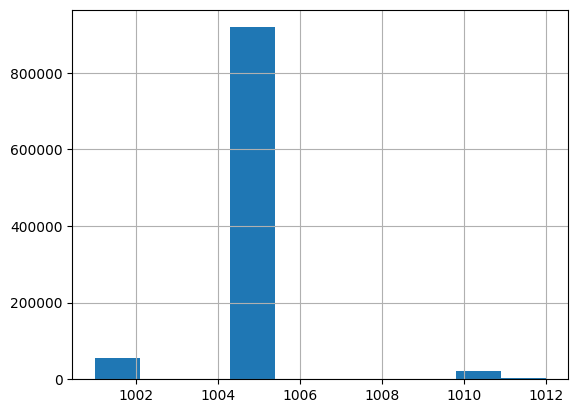

In [20]:
df['C1'].hist()
# all data are belongs to the same category, may not be useful for modeling

## Feature engineering

### 1. separate weekday and weekend

In [21]:
df['is_weekend'] = df['weekday'].apply(lambda x:1 if x >= 5 else 0)
df.groupby('is_weekend')['click'].mean()
# the click rate is slightly higher on weekends

is_weekend
0    0.167036
1    0.183521
Name: click, dtype: float64

### 2. combine C15 and C16 as revolution

In [22]:
df["resolution"] = df["C15"].astype(str) + "_" + df["C16"].astype(str)

### 3. Applying target encoding to categorical features

In [41]:
from sklearn.model_selection import train_test_split

# all features are categorical
# select categorical features for target encoding
target_enc_cols = ['banner_pos',
    'site_id', 'site_domain', 'site_category',
    'app_id', 'app_domain', 'app_category',
    'device_id', 'device_ip', 'device_model',
    'device_type', 'device_conn_type',
    'C1', 'C14', 'C17', 'C18', 'C19', 'C20', 'C21',
    'resolution'
]


# split the dataset into training and validation sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

# calculate the global mean click rate，used for filling missing values in target encoding
global_mean = df_train['click'].mean()


# target encoding function for training set
for col in target_enc_cols:
    click_mean_map = df_train.groupby(col)['click'].mean()
    df_train[col + "_te"] = df_train[col].map(click_mean_map)
    df_val[col + "_te"] = df_val[col].map(click_mean_map).fillna(global_mean)

df_train.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type_te,device_conn_type_te,C1_te,C14_te,C17_te,C18_te,C19_te,C20_te,C21_te,resolution_te
566853,1.299492e+18,1,1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0.169499,0.181460,0.169619,0.272680,0.272680,0.294072,0.245668,0.214097,0.390946,0.158754
382311,6.598554e+18,0,8,1005,0,85f751fd,c4e18dd6,50e219e0,03528b27,2347f47a,...,0.169499,0.135724,0.169619,0.140841,0.189781,0.159017,0.167245,0.193489,0.187659,0.158754
241519,2.851131e+17,0,19,1005,0,6399eda6,968765cd,f028772b,ecad2386,7801e8d9,...,0.169499,0.181460,0.169619,0.127990,0.124653,0.146205,0.162525,0.176360,0.213946,0.158754
719220,1.548536e+19,0,2,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0.169499,0.181460,0.169619,0.198077,0.189781,0.159017,0.167245,0.212392,0.187659,0.158754
905718,8.254269e+18,0,3,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,0.169499,0.181460,0.169619,0.072698,0.072698,0.146205,0.167245,0.193489,0.072411,0.158754
259727,1.396125e+19,0,9,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0.169499,0.181460,0.169619,0.204484,0.189781,0.159017,0.167245,0.212392,0.187659,0.158754
90029,8.887976e+18,0,17,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,0.169499,0.181460,0.169619,0.129310,0.128286,0.146205,0.176233,0.124909,0.118050,0.158754
529300,1.773424e+19,0,0,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,...,0.169499,0.181460,0.169619,0.169783,0.167325,0.159017,0.245668,0.193489,0.116525,0.158754
570430,1.276649e+19,0,13,1005,0,ff361da0,6dbd48f0,3e814130,ecad2386,7801e8d9,...,0.169499,0.181460,0.169619,0.080051,0.080051,0.146205,0.167245,0.194790,0.203939,0.158754
720377,1.420778e+19,0,7,1005,1,17caea14,0dde25ec,f028772b,ecad2386,7801e8d9,...,0.169499,0.181460,0.169619,0.243041,0.243041,0.159017,0.243041,0.176360,0.139185,0.158754


### From the heat map, I noticed that there are several pairs have pretty high corelations of each other, so I may only use one feature among each groups to build up the models.  
Those pairs are site_id and site_domain, app_id and app_domain, C1 and device type, C14 and C17

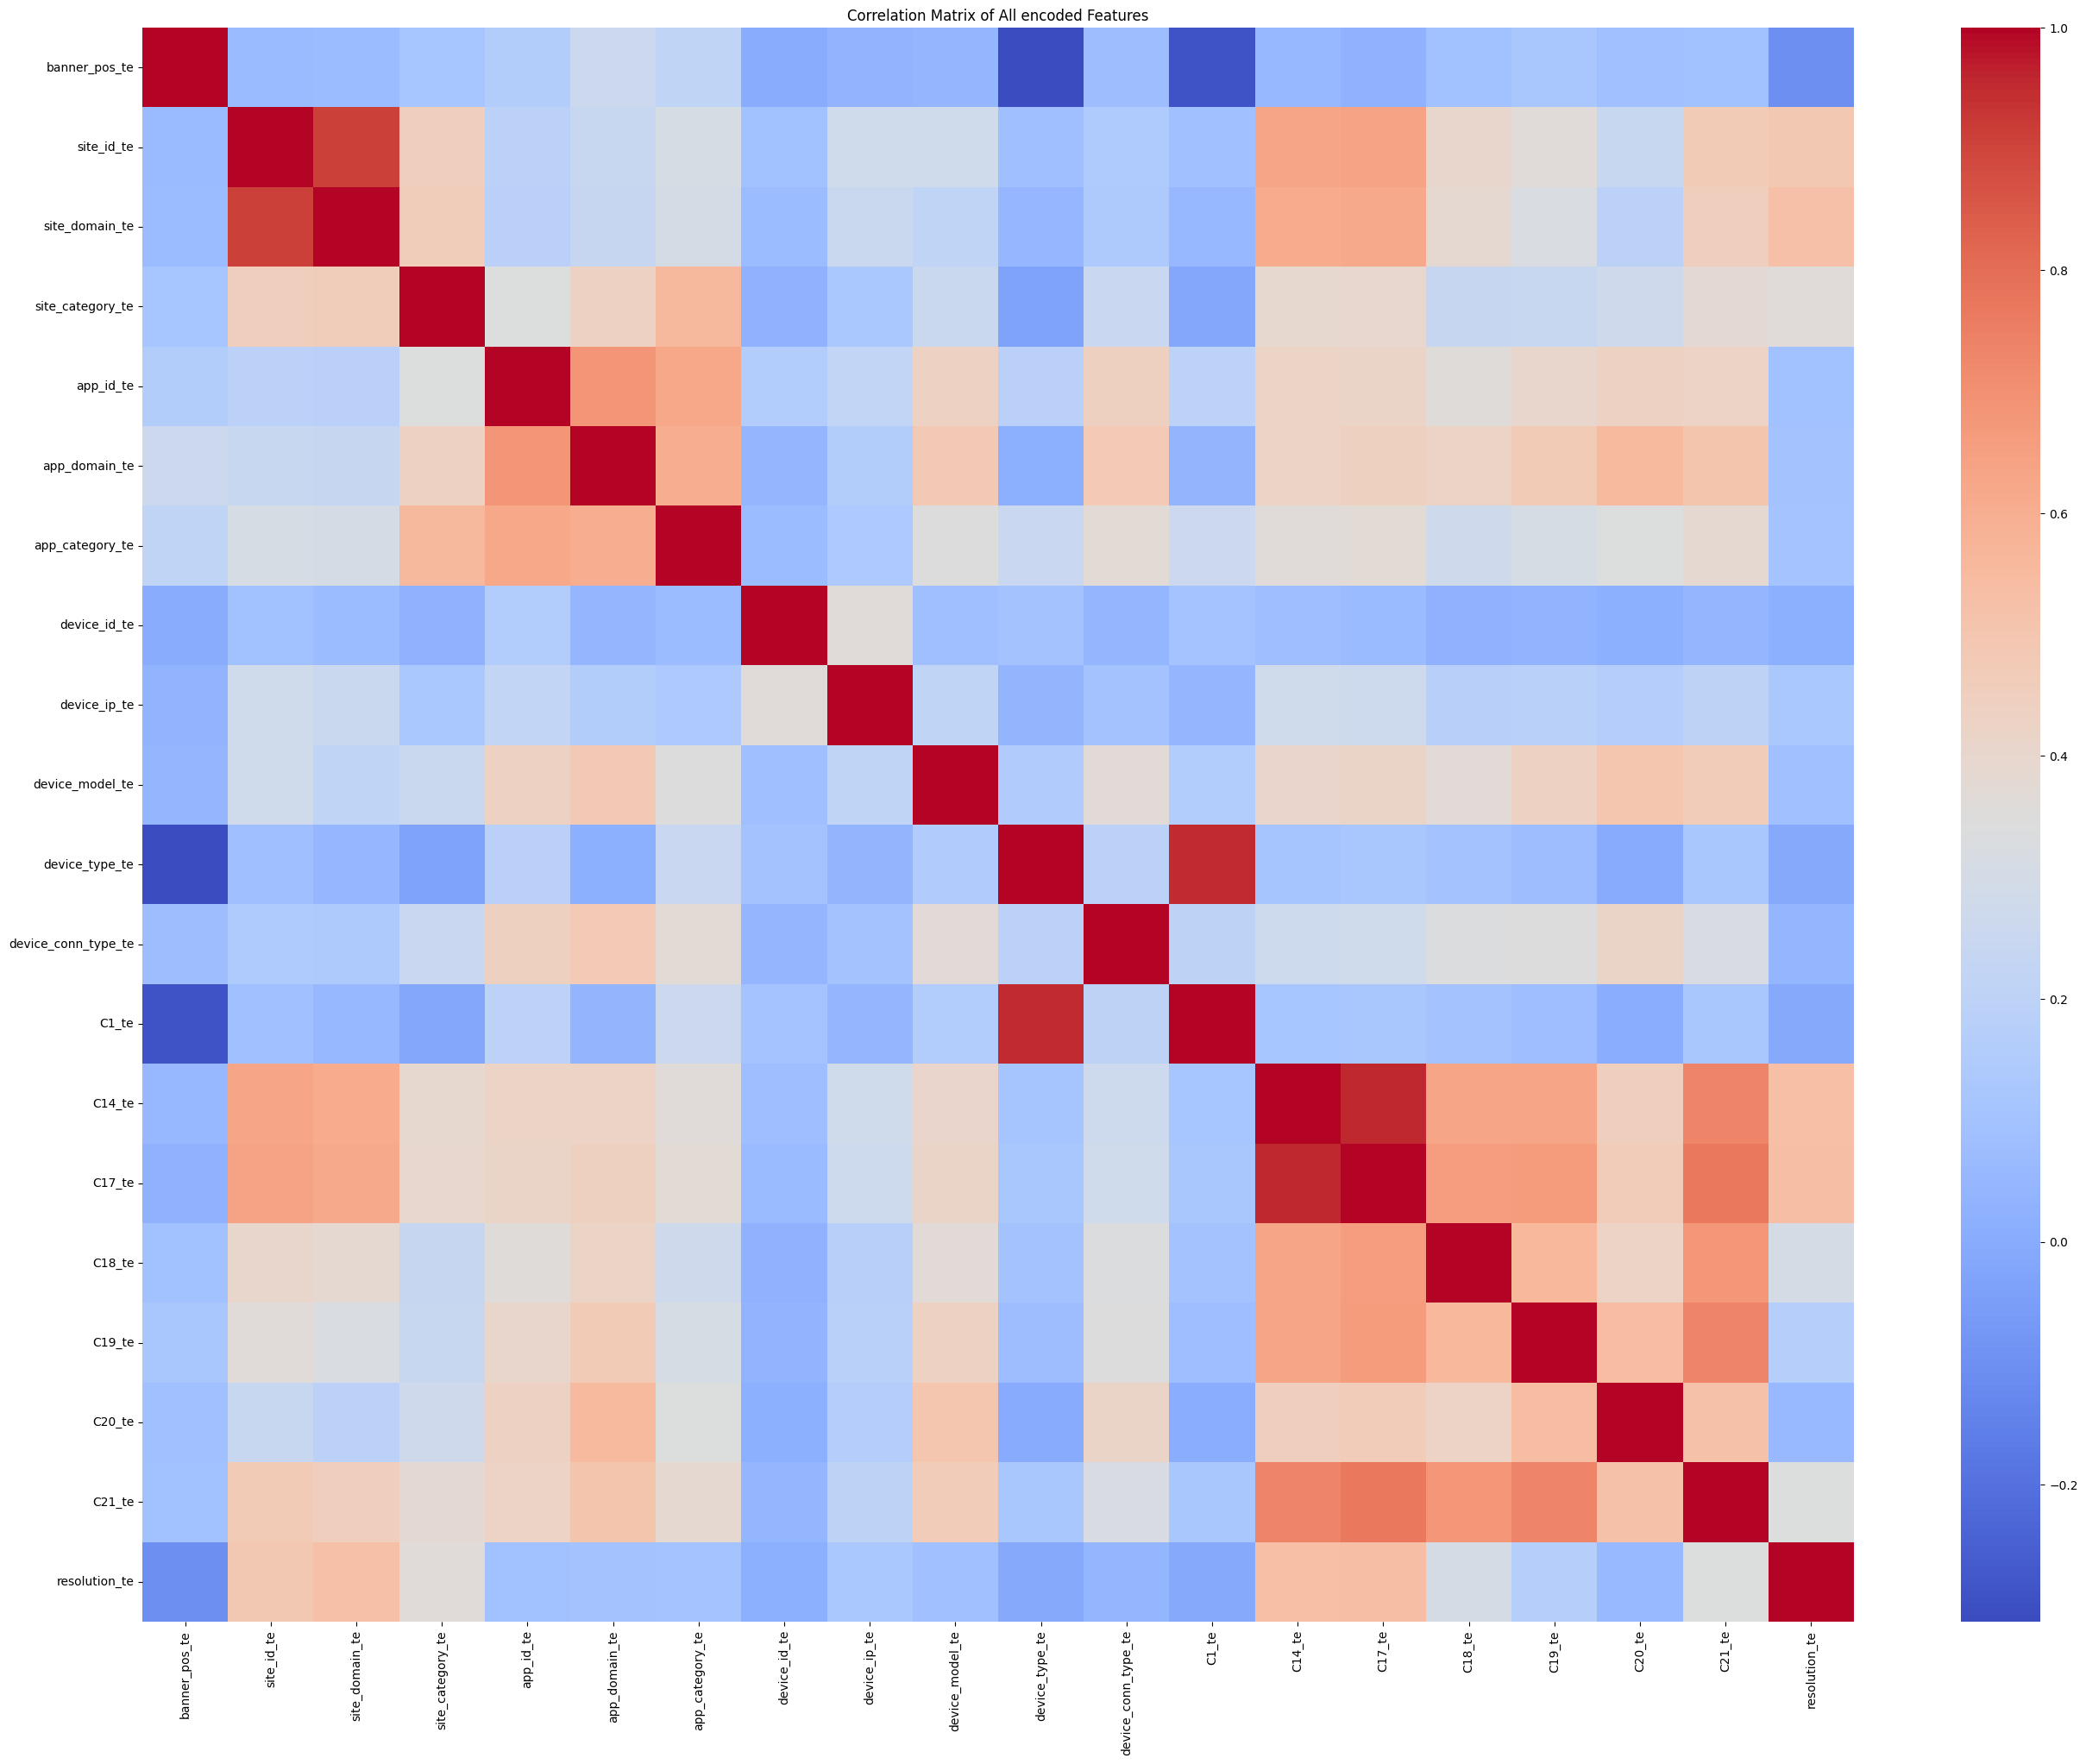

In [ ]:
# test corr between encoded features
encoding_features = ['banner_pos_te',
    'site_id_te', 'site_domain_te', 'site_category_te',
    'app_id_te', 'app_domain_te', 'app_category_te',
    'device_id_te', 'device_ip_te', 'device_model_te',
    'device_type_te', 'device_conn_type_te',
    'C1_te', 'C14_te', 'C17_te', 'C18_te', 'C19_te', 'C20_te', 'C21_te',
    'resolution_te'
]

plt.figure(figsize=(32, 24))
corr_matrix = df_train[encoding_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All encoded Features')
plt.show()



## Selecting features

In [24]:
# for now, only use categorical features with relatively less categories
selected_features = ['is_weekend', 'banner_pos_te', 
                     'site_category_te', 'app_category_te',
                     'device_type_te', 'device_conn_type_te', 
                     'resolution_te', 'C18_te', 'C19_te', 'C21_te']

X_train = df_train[selected_features]
X_val = df_val[selected_features]
y_train = df_train['click']
y_val = df_val['click']

X_train.head(10)
# X_val.head(10)

,is_weekend,banner_pos_te,site_category_te,app_category_te,device_type_te,device_conn_type_te,resolution_te,C18_te,C19_te,C21_te
566853,0,0.184361,0.180049,0.199666,0.169499,0.181460,0.158754,0.294072,0.245668,0.390946
382311,0,0.164352,0.128252,0.091445,0.169499,0.135724,0.158754,0.159017,0.167245,0.187659
241519,0,0.164352,0.180049,0.199666,0.169499,0.181460,0.158754,0.146205,0.162525,0.213946
719220,1,0.164352,0.208602,0.199666,0.169499,0.181460,0.158754,0.159017,0.167245,0.187659
905718,0,0.164352,0.128252,0.107871,0.169499,0.181460,0.158754,0.146205,0.167245,0.072411
259727,0,0.164352,0.208602,0.199666,0.169499,0.181460,0.158754,0.159017,0.167245,0.187659
90029,1,0.164352,0.128252,0.107871,0.169499,0.181460,0.158754,0.146205,0.176233,0.118050
529300,0,0.164352,0.128252,0.092933,0.169499,0.181460,0.158754,0.159017,0.245668,0.116525
570430,0,0.164352,0.283591,0.199666,0.169499,0.181460,0.158754,0.146205,0.167245,0.203939
720377,1,0.184361,0.180049,0.199666,0.169499,0.181460,0.158754,0.159017,0.243041,0.139185


<Axes: >

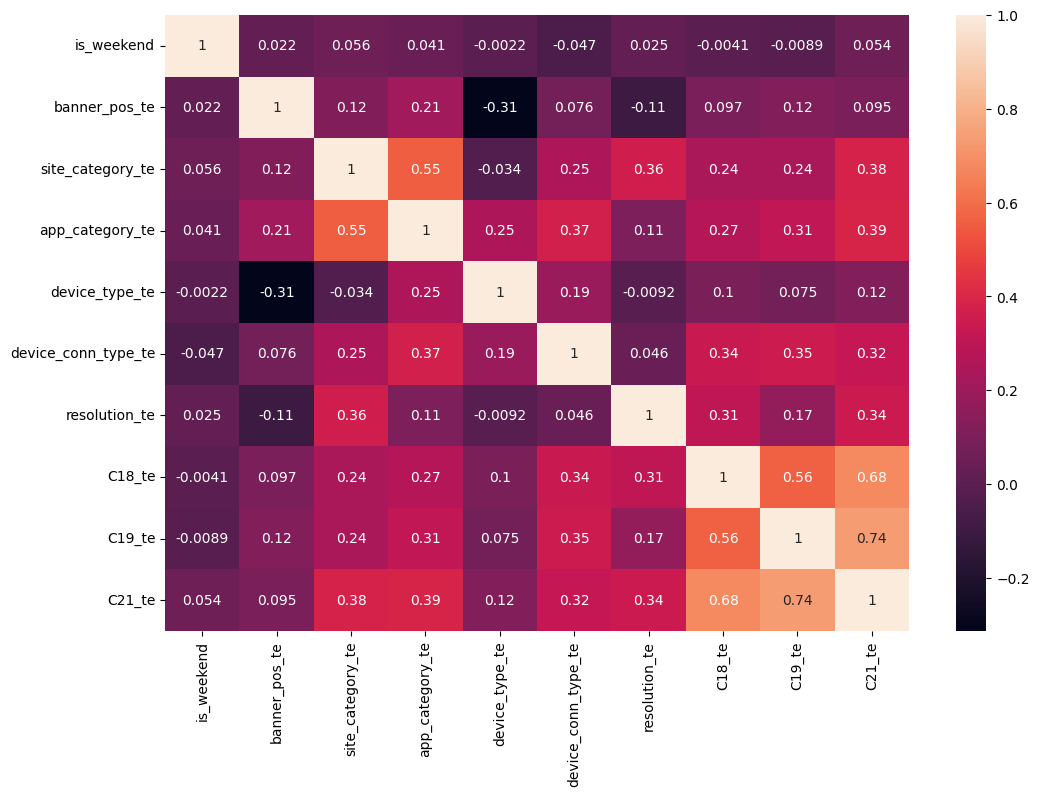

In [ ]:
# test corr between selected features
plt.figure(figsize=(12, 8))
corr = X_train.corr()
sns.heatmap(corr,annot = True)



## Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model.fit(X_train, y_train)

#  Predict on the validation set and calculate AUC
y_pred_lr = lr_model.predict_proba(X_val)[:, 1]
auc_lr = roc_auc_score(y_val, y_pred_lr)
auc_lr

# the average AUC is around 0.66, which is not bad for a simple model
print(f'Logistic Regression AUC: {auc_lr:.4f}')

Logistic Regression AUC: 0.6636


## Random forest model

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on the validation set and calculate AUC
y_pred_rf = rf_model.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_pred_rf)
auc_rf

# the average AUC is around 0.70, which is better than logistic regression
print(f'Random Forest AUC: {auc_rf:.4f}')

Random Forest AUC: 0.7030


## XGBoost model

In [28]:
%pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Prepare data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 12,
    'seed': 42
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=200, evals=[(dval, "val")],
                      early_stopping_rounds=10, verbose_eval=True)

y_pred_xgb = xgb_model.predict(dval)
auc_xgb = roc_auc_score(y_val, y_pred_xgb)

# the average AUC is around 0.704, which is similar to Random Forest, better than Logistic Regression
print("XGBoost AUC:", auc_xgb)

[0]	val-auc:0.70053
[1]	val-auc:0.70084
[2]	val-auc:0.70099
[3]	val-auc:0.70128
[4]	val-auc:0.70140
[5]	val-auc:0.70265
[6]	val-auc:0.70328
[7]	val-auc:0.70340
[8]	val-auc:0.70352
[9]	val-auc:0.70394
[10]	val-auc:0.70406
[11]	val-auc:0.70411
[12]	val-auc:0.70410
[13]	val-auc:0.70408
[14]	val-auc:0.70434
[15]	val-auc:0.70458
[16]	val-auc:0.70475
[17]	val-auc:0.70485
[18]	val-auc:0.70494
[19]	val-auc:0.70502
[20]	val-auc:0.70510
[21]	val-auc:0.70516
[22]	val-auc:0.70525
[23]	val-auc:0.70532
[24]	val-auc:0.70535
[25]	val-auc:0.70539
[26]	val-auc:0.70553
[27]	val-auc:0.70552
[28]	val-auc:0.70560
[29]	val-auc:0.70560
[30]	val-auc:0.70573
[31]	val-auc:0.70585
[32]	val-auc:0.70592
[33]	val-auc:0.70596
[34]	val-auc:0.70596
[35]	val-auc:0.70599
[36]	val-auc:0.70606
[37]	val-auc:0.70606
[38]	val-auc:0.70610
[39]	val-auc:0.70611
[40]	val-auc:0.70609
[41]	val-auc:0.70608
[42]	val-auc:0.70611
[43]	val-auc:0.70615
[44]	val-auc:0.70618
[45]	val-auc:0.70618
[46]	val-auc:0.70618
[47]	val-auc:0.70619
[4

## Try blending of three models

In [39]:
# meta feature matrix
X_blend = np.vstack([y_pred_lr, y_pred_rf, y_pred_xgb]).T

#  Create a blending model using Logistic Regression
blend_model = LogisticRegression()
blend_model.fit(X_blend, y_val)

#  Predict on the validation set using the blending model
y_pred_meta = blend_model.predict_proba(X_blend)[:, 1]
auc_blend_meta = roc_auc_score(y_val, y_pred_meta)
print("Blending (LogReg) AUC:", auc_blend_meta)

# no sfficient improvement, but still better than Logistic Regression

Blending (LogReg) AUC: 0.7062733615339272


### Try to add more features and restart the process

In [47]:
# adding C14, C20, site_id, app_id
selected_features2 = ['is_weekend', 'banner_pos_te', 
                     'site_category_te', 'app_category_te',
                     'device_type_te', 'device_conn_type_te', 
                     'resolution_te', 'C18_te', 'C19_te', 'C21_te', 'C14_te', 'C20_te', 'site_id_te', 'app_id_te']


X_train2 = df_train[selected_features2]
X_val2 = df_val[selected_features2]
y_train2 = df_train['click']
y_val2 = df_val['click']

X_train2.head(10)


,is_weekend,banner_pos_te,site_category_te,app_category_te,device_type_te,device_conn_type_te,resolution_te,C18_te,C19_te,C21_te,C14_te,C20_te,site_id_te,app_id_te
566853,0,0.184361,0.180049,0.199666,0.169499,0.181460,0.158754,0.294072,0.245668,0.390946,0.272680,0.214097,0.298504,0.199204
382311,0,0.164352,0.128252,0.091445,0.169499,0.135724,0.158754,0.159017,0.167245,0.187659,0.140841,0.193489,0.118449,0.144422
241519,0,0.164352,0.180049,0.199666,0.169499,0.181460,0.158754,0.146205,0.162525,0.213946,0.127990,0.176360,0.104029,0.199204
719220,1,0.164352,0.208602,0.199666,0.169499,0.181460,0.158754,0.159017,0.167245,0.187659,0.198077,0.212392,0.205922,0.199204
905718,0,0.164352,0.128252,0.107871,0.169499,0.181460,0.158754,0.146205,0.167245,0.072411,0.072698,0.193489,0.118449,0.194876
259727,0,0.164352,0.208602,0.199666,0.169499,0.181460,0.158754,0.159017,0.167245,0.187659,0.204484,0.212392,0.205922,0.199204
90029,1,0.164352,0.128252,0.107871,0.169499,0.181460,0.158754,0.146205,0.176233,0.118050,0.129310,0.124909,0.118449,0.129790
529300,0,0.164352,0.128252,0.092933,0.169499,0.181460,0.158754,0.159017,0.245668,0.116525,0.169783,0.193489,0.118449,0.188335
570430,0,0.164352,0.283591,0.199666,0.169499,0.181460,0.158754,0.146205,0.167245,0.203939,0.080051,0.194790,0.090090,0.199204
720377,1,0.184361,0.180049,0.199666,0.169499,0.181460,0.158754,0.159017,0.243041,0.139185,0.243041,0.176360,0.232176,0.199204


## Logistic Regression

The AUC increased form 0.66 to 0.73. The performance has improved, meaning that these added features included some useful information that enable us to better predict our lable.

In [ ]:
# Train a logistic regression model
lr_model2 = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_model2.fit(X_train2, y_train2)

#  Predict on the validation set and calculate AUC
y_pred_lr2 = lr_model2.predict_proba(X_val2)[:, 1]
auc_lr2 = roc_auc_score(y_val2, y_pred_lr2)
auc_lr2

# the new average AUC is around 0.73
print(f'Logistic Regression AUC: {auc_lr2:.4f}')

Logistic Regression AUC: 0.7287


## Random Forest

The AUC rised form 0.703 to 0.74. Meaning that after adding more features the performance of the random forest model only improved a little bit. 

In [ ]:
# Train a Random Forest model
rf_model2 = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1)
rf_model2.fit(X_train2, y_train2)

# Predict on the validation set and calculate AUC
y_pred_rf2 = rf_model2.predict_proba(X_val2)[:, 1]
auc_rf2 = roc_auc_score(y_val2, y_pred_rf2)
auc_rf2

# the new average AUC is around 0.74
print(f'Random Forest AUC: {auc_rf2:.4f}')

Random Forest AUC: 0.7399


## XGBoost model

Again the AUC has improved from 0.70 to 0.74 after adding new features

In [ ]:
# Prepare data for XGBoost
dtrain2 = xgb.DMatrix(X_train2, label=y_train2)
dval2 = xgb.DMatrix(X_val2, label=y_val2)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 12,
    'seed': 42
}

# Train the XGBoost model
xgb_model2 = xgb.train(params, dtrain2, num_boost_round=200, evals=[(dval2, "val")],
                      early_stopping_rounds=10, verbose_eval=True)

y_pred_xgb2 = xgb_model2.predict(dval2)
auc_xgb2 = roc_auc_score(y_val2, y_pred_xgb2)


# the average AUC is around 0.74, which is similar to Random Forest and Logistic Regression
print("XGBoost AUC:", auc_xgb2)

[0]	val-auc:0.73668
[1]	val-auc:0.73845
[2]	val-auc:0.73883
[3]	val-auc:0.73920
[4]	val-auc:0.73932
[5]	val-auc:0.73947
[6]	val-auc:0.73974
[7]	val-auc:0.73977
[8]	val-auc:0.73980
[9]	val-auc:0.73982
[10]	val-auc:0.73991
[11]	val-auc:0.73991
[12]	val-auc:0.73999
[13]	val-auc:0.74009
[14]	val-auc:0.74012
[15]	val-auc:0.74014
[16]	val-auc:0.74022
[17]	val-auc:0.74027
[18]	val-auc:0.74024
[19]	val-auc:0.74028
[20]	val-auc:0.74030
[21]	val-auc:0.74029
[22]	val-auc:0.74032
[23]	val-auc:0.74032
[24]	val-auc:0.74034
[25]	val-auc:0.74034
[26]	val-auc:0.74033
[27]	val-auc:0.74033
[28]	val-auc:0.74040
[29]	val-auc:0.74043
[30]	val-auc:0.74045
[31]	val-auc:0.74048
[32]	val-auc:0.74048
[33]	val-auc:0.74051
[34]	val-auc:0.74053
[35]	val-auc:0.74058
[36]	val-auc:0.74062
[37]	val-auc:0.74060
[38]	val-auc:0.74060
[39]	val-auc:0.74059
[40]	val-auc:0.74058
[41]	val-auc:0.74058
[42]	val-auc:0.74058
[43]	val-auc:0.74070
[44]	val-auc:0.74070
[45]	val-auc:0.74070
[46]	val-auc:0.74071
[47]	val-auc:0.74072
[4

## Blending Model

In [ ]:
# meta feature matrix
X_blend2 = np.vstack([y_pred_lr2, y_pred_rf2, y_pred_xgb2]).T

#  Create a blending model using Logistic Regression
blend_model2 = LogisticRegression()
blend_model2.fit(X_blend2, y_val2)

#  Predict on the validation set using the blending model
y_pred_meta2 = blend_model2.predict_proba(X_blend2)[:, 1]
auc_blend_meta2 = roc_auc_score(y_val2, y_pred_meta2)
print("Blending (LogReg) AUC:", auc_blend_meta2)

# combine three models with similar AUC, the final AUC is still around 0.74

Blending (LogReg) AUC: 0.7414510833349411


In coclusion, after adding more features, the perfomance of our prediction model did improve. The added features can explain some part information about the click rate. 

## Test and Submission

In [66]:
# read test dataset
test_df = pd.read_csv('test.gz')
sample = pd.read_csv('sampleSubmission.gz')

# do the same feature engineering
# manage the raw time
test_df['weekday'] = test_df['hour'].apply(lambda x:datesplit(x).weekday())
test_df['hour'] = test_df['hour'].apply(lambda x:datesplit(x).hour)
test_df['is_weekend'] = test_df['weekday'].apply(lambda x:1 if x >= 5 else 0)
test_df["resolution"] = test_df["C15"].astype(str) + "_" + test_df["C16"].astype(str)

target_enc_cols = ['banner_pos',
    'site_id', 'site_domain', 'site_category',
    'app_id', 'app_domain', 'app_category',
    'device_id', 'device_ip', 'device_model',
    'device_type', 'device_conn_type',
    'C1', 'C14', 'C17', 'C18', 'C19', 'C20', 'C21',
    'resolution'
]


# target encoding function for training set
for col in target_enc_cols:
    click_mean_map = df_train.groupby(col)['click'].mean()
    test_df[col + "_te"] = test_df[col].map(click_mean_map).fillna(global_mean)

X_test = test_df[selected_features2]
y_pred_test_lr= lr_model2.predict_proba(X_test)[:, 1]
y_pred_test_rf = rf_model2.predict_proba(X_test)[:, 1]

dtest = xgb.DMatrix(X_test)
y_pred_test_xgb = xgb_model2.predict(dtest)

# belending
X_test_blend = np.vstack([y_pred_test_lr, y_pred_test_rf, y_pred_test_xgb]).T
y_pred_test_blend = blend_model2.predict_proba(X_test_blend)[:, 1]

In [67]:
submission = pd.DataFrame({
    'id': sample['id'],  # 用 sampleSubmission.gz 的 id 顺序
    'click': y_pred_test_blend
})
submission.to_csv('submission.csv', index=False)

#### My score is 0.40181 and public score is 0.40370. The rank is not good. In between 1000 and 1100.